In [94]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
df=pd.read_csv("8-fraud_detection.csv")

In [113]:
df.head()


,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      10000 non-null  float64
 1   transaction_risk_score  10000 non-null  float64
 2   is_fraud                10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [14]:
X=df.drop(columns="is_fraud")
y=df["is_fraud"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
df["is_fraud"].value_counts()

is_fraud
0    9846
1     154
Name: count, dtype: int64

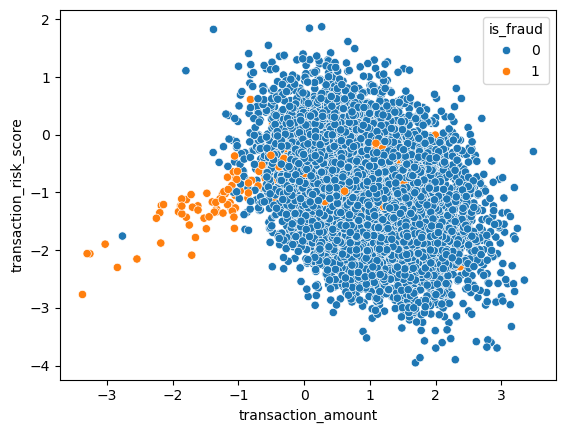

In [32]:
sns.scatterplot(x=df["transaction_amount"],y=df["transaction_risk_score"],hue=y)
plt.show()

In [33]:
model=LogisticRegression()

In [68]:


#hyperparameter tuning with class weights to handle imbalance
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]



In [71]:
params=dict(penalty=penaltys,C=c_values,solver=solver,class_weight=class_weight)

In [72]:


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [122]:
cv=StratifiedKFold()

In [123]:
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [124]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [125]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [126]:
y_pred=grid.predict(X_test)

In [127]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [128]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [129]:
accuracy_score=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)

In [131]:
accuracy_score

0.9896

In [132]:
confusion_matrix

array([[2465,    0],
       [  26,    9]])

In [133]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      2465\n           1       1.00      0.26      0.41        35\n\n    accuracy                           0.99      2500\n   macro avg       0.99      0.63      0.70      2500\nweighted avg       0.99      0.99      0.99      2500\n'

In [147]:
model_prob=grid.predict_proba(X_test)

In [148]:
model_prob

array([[0.92404349, 0.07595651],
       [0.99672099, 0.00327901],
       [0.9422859 , 0.0577141 ],
       ...,
       [0.92179005, 0.07820995],
       [0.9877349 , 0.0122651 ],
       [0.97176743, 0.02823257]])

In [149]:
model_prob=model_prob[:,1]

In [150]:
from sklearn.metrics import roc_curve,roc_auc_score

In [151]:
model_auc=roc_auc_score(y_test,model_prob)

In [152]:
model_auc

np.float64(0.7266183714865255)

In [153]:
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [154]:
thresholds

array([           inf, 9.92818837e-01, 4.52443490e-01, 4.43475624e-01,
       4.33150520e-01, 3.67136857e-01, 3.27317370e-01, 2.41989428e-01,
       2.32471732e-01, 2.06213596e-01, 2.05623273e-01, 1.51245085e-01,
       1.49586240e-01, 9.99674078e-02, 9.96055170e-02, 9.31816059e-02,
       9.30315974e-02, 5.32798616e-02, 5.31501018e-02, 4.79400665e-02,
       4.77585277e-02, 2.57182837e-02, 2.56790431e-02, 1.92728694e-02,
       1.92619500e-02, 1.14683716e-02, 1.14491410e-02, 1.11493902e-02,
       1.11441433e-02, 9.04262301e-03, 9.00687318e-03, 7.57147136e-03,
       7.56503631e-03, 4.47320060e-03, 4.47154679e-03, 4.26991436e-03,
       4.25767664e-03, 3.74594525e-03, 3.74557823e-03, 2.44631105e-03,
       2.43719822e-03, 2.08818850e-03, 2.08760817e-03, 1.02160422e-03,
       1.00354748e-03, 7.06405987e-04, 7.05942631e-04, 7.04905375e-04,
       7.04095559e-04, 1.12004625e-04])

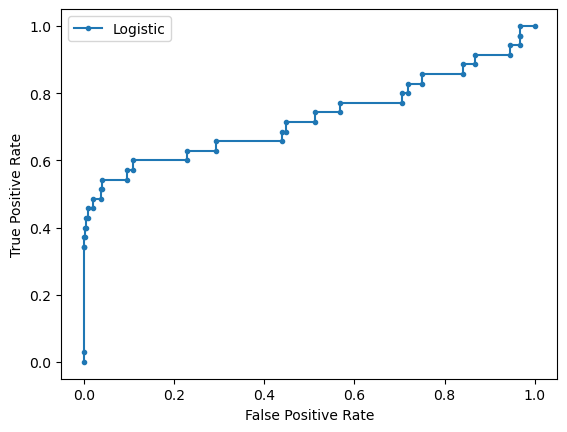

In [155]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

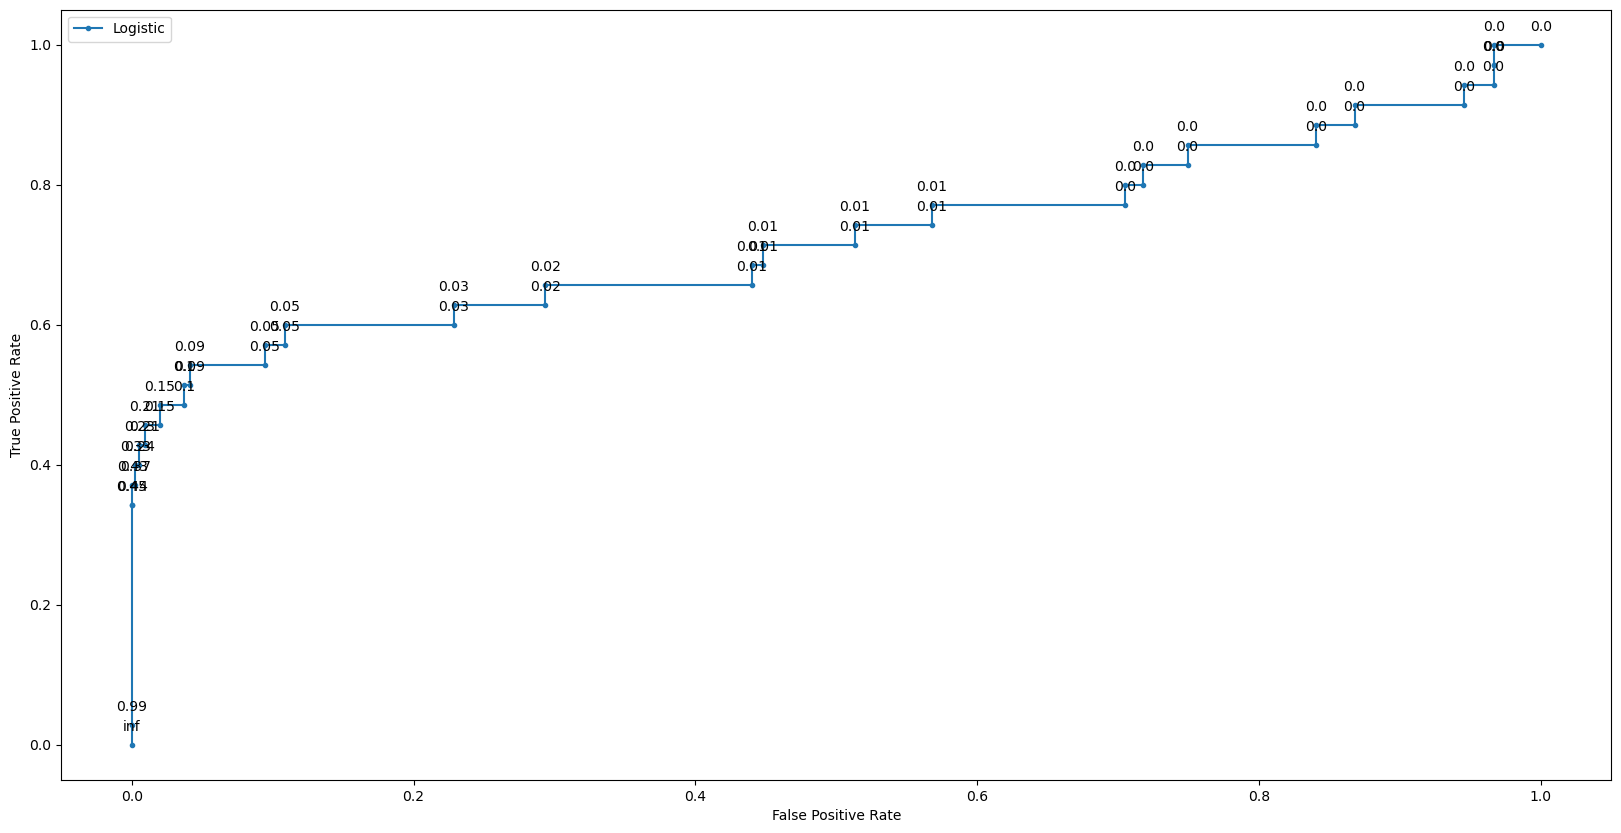

In [156]:


# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()



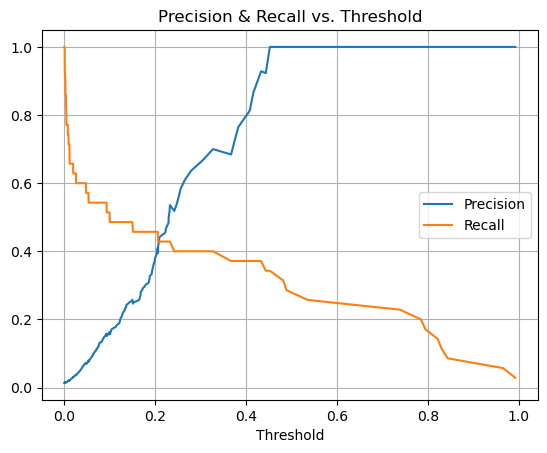

In [158]:



#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()

